In [2]:
import os
import re
import sys
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from invisible_cities.database  import load_db
from invisible_cities.io.dst_io import load_dst
from invisible_cities.io.dst_io import df_writer
%config InlineBackend.figure_format = 'svg'


In [14]:
# Load in the database information
# Configure the detector database
detector_db = "next100"
datapmt = load_db.DataPMT(detector_db, 0)
xpmt, ypmt = datapmt["X"].values, datapmt["Y"].values
sensorids  = datapmt["SensorID"].values
pmt = "PmtR11410"

S1 Table validation plots

In [15]:
# Load in the table
lt     = load_dst("../LT/NEXT100-MC_S1_LT.h5", "LT", "LightTable")
err    = load_dst("../LT/NEXT100-MC_S1_LT.h5", "LT", "Error")
config = load_dst("../LT/NEXT100-MC_S1_LT.h5", "LT", "Config")

bv=20

# display(lt)
# print(sorted(lt.y.unique()))

# display(err)

lt_old     = load_dst(f"../LT/Old_LT/NEXT100_S1_LT.h5", "LT", "LightTable")
config_old = load_dst(f"../LT/Old_LT/NEXT100_S1_LT.h5", "LT", "Config")

In [16]:
display(lt)
print(max(lt.y))
print(min(lt.y))
print(sorted(lt.x.unique()))
print(sorted(lt.y.unique()))
print(sorted(lt.z.unique()))

display(lt_old)
print(max(lt_old.y))
print(min(lt_old.y))
print(sorted(lt_old.x.unique()))
print(sorted(lt_old.y.unique()))
print(sorted(lt_old.z.unique()))

x       y       z  PmtR11410_0  PmtR11410_1  PmtR11410_2  \
0     -490.00 -163.35     5.0     0.000142     0.000131     0.000138   
1     -490.00 -163.35    25.0     0.000215     0.000207     0.000215   
2     -490.00 -163.35    45.0     0.000242     0.000243     0.000235   
3     -490.00 -163.35    65.0     0.000245     0.000265     0.000245   
4     -490.00 -163.35    85.0     0.000252     0.000264     0.000263   
...       ...     ...     ...          ...          ...          ...   
12476  489.95  163.30  1125.0     0.000485     0.000464     0.000393   
12477  489.95  163.30  1145.0     0.000474     0.000458     0.000385   
12478  489.95  163.30  1165.0     0.000449     0.000411     0.000359   
12479  489.95  163.30  1185.0     0.000273     0.000269     0.000252   
12480  489.95  228.63     5.0     0.000071     0.000082     0.000098   

       PmtR11410_3  PmtR11410_4  PmtR11410_5  PmtR11410_6  ...  PmtR11410_51  \
0         0.000138     0.000145     0.000137     0.000135  ...      0.000131   
1         0.000205     0.000208     0.000215     0.000206  ...      0.000196   
2         0.000236     0.000239     0.000241     0.000239  ...      0.000230   
3         0.000243     0.000253     0.000245     0.000237  ...      0.000239   
4         0.000260     0.000263     0.000252     0.000249  ...      0.000244   
...            ...          ...          ...          ...  ...           ...   
12476     0.000360     0.000366     0.000407     0.000557  ...      0.000314   
12477     0.000355     0.000361     0.000408     0.000570  ...      0.000308   
12478     0.000328     0.000336     0.000374     0.000500  ...      0.000278   
12479     0.000244     0.000242     0.000263     0.000243  ...      0.000225   
12480     0.000094     0.000098     0.000094     0.000069  ...      0.000080   

       PmtR11410_52  PmtR11410_53  PmtR11410_54  PmtR11410_55  PmtR11410_56  \
0          0.000124      0.000133      0.000136      0.000125      0.000127   
1          0.000208      0.000205      0.000193      0.000205      0.000198   
2          0.000229      0.000234      0.000220      0.000223      0.000224   
3          0.000237      0.000237      0.000234      0.000229      0.000234   
4          0.000242      0.000249      0.000239      0.000235      0.000246   
...             ...           ...           ...           ...           ...   
12476      0.000330      0.000432      0.000445      0.000334      0.000312   
12477      0.000318      0.000421      0.000363      0.000344      0.000298   
12478      0.000299      0.000351      0.000298      0.000313      0.000286   
12479      0.000225      0.000203      0.000182      0.000234      0.000227   
12480      0.000065      0.000073      0.000081      0.000068      0.000078   

       PmtR11410_57  PmtR11410_58  PmtR11410_59  PmtR11410_total  
0          0.000137      0.000132      0.000128         0.007640  
1          0.000200      0.000199      0.000201         0.011766  
2          0.000224      0.000235      0.000231         0.013237  
3          0.000229      0.000236      0.000241         0.013702  
4          0.000252      0.000257      0.000239         0.014182  
...             ...           ...           ...              ...  
12476      0.000318      0.000333      0.000466         0.022341  
12477      0.000301      0.000331      0.000391         0.021682  
12478      0.000271      0.000304      0.000317         0.019513  
12479      0.000225      0.000225      0.000191         0.013045  
12480      0.000080      0.000072      0.000080         0.004714  

[12481 rows x 64 columns]

489.9499999999999
-489.99999999999994
[-489.99999999999994, -424.66999999999996, -359.34, -294.01, -228.68, -163.35000000000002, -98.02000000000004, -32.690000000000055, 32.63999999999993, 97.96999999999986, 163.2999999999999, 228.62999999999994, 293.95999999999987, 359.2899999999998, 424.61999999999983, 489.9499999999999]
[-489.99999999999994, -424.66999999999996, -359.34, -294.01, -228.68, -163.35000000000002, -98.02000000000004, -32.690000000000055, 32.63999999999993, 97.96999999999986, 163.2999999999999, 228.62999999999994, 293.95999999999987, 359.2899999999998, 424.61999999999983, 489.9499999999999]
[5.0, 25.0, 45.0, 65.0, 85.0, 105.0, 125.0, 145.0, 165.0, 185.0, 205.0, 225.0, 245.0, 265.0, 285.0, 305.0, 325.0, 345.0, 365.0, 385.0, 405.0, 425.0, 445.0, 465.0, 485.0, 505.0, 525.0, 545.0, 565.0, 585.0, 605.0, 625.0, 645.0, 665.0, 685.0, 705.0, 725.0, 745.0, 765.0, 785.0, 805.0, 825.0, 845.0, 865.0, 885.0, 905.0, 925.0, 945.0, 965.0, 985.0, 1005.0, 1025.0, 1045.0, 1065.0, 1085.0, 110

x       y       z  PmtR11410_0  PmtR11410_1  PmtR11410_2  \
0      294.00 -294.00     5.0     0.000157     0.000161     0.000159   
1      228.67  359.33     5.0     0.000154     0.000157     0.000156   
2      294.00  359.33     5.0     0.000142     0.000144     0.000141   
3     -359.33  228.67     5.0     0.000157     0.000160     0.000157   
4       32.67 -490.00     5.0     0.000101     0.000103     0.000101   
...       ...     ...     ...          ...          ...          ...   
10795   98.00 -359.33  1185.0     0.000333     0.000276     0.000268   
10796  163.33  163.33  1185.0     0.000459     0.000522     0.000390   
10797  -98.00  -98.00  1185.0     0.000363     0.000349     0.000400   
10798   32.67  359.33  1185.0     0.000318     0.000415     0.000401   
10799 -424.67  228.67  1185.0     0.000199     0.000220     0.000266   

       PmtR11410_3  PmtR11410_4  PmtR11410_5  PmtR11410_6  ...  PmtR11410_51  \
0         0.000157     0.000156     0.000156     0.000155  ...      0.000146   
1         0.000157     0.000158     0.000157     0.000154  ...      0.000142   
2         0.000145     0.000148     0.000143     0.000141  ...      0.000135   
3         0.000155     0.000159     0.000156     0.000153  ...      0.000146   
4         0.000100     0.000105     0.000104     0.000100  ...      0.000099   
...            ...          ...          ...          ...  ...           ...   
10795     0.000295     0.000376     0.000425     0.000314  ...      0.000281   
10796     0.000310     0.000300     0.000341     0.000456  ...      0.000226   
10797     0.000518     0.000576     0.000450     0.000289  ...      0.000374   
10798     0.000308     0.000267     0.000270     0.000296  ...      0.000229   
10799     0.000271     0.000222     0.000200     0.000182  ...      0.000214   

       PmtR11410_52  PmtR11410_53  PmtR11410_54  PmtR11410_55  PmtR11410_56  \
0          0.000151      0.000149      0.000150      0.000146      0.000148   
1          0.000145      0.000146      0.000147      0.000148      0.000143   
2          0.000138      0.000136      0.000136      0.000138      0.000134   
3          0.000143      0.000146      0.000147      0.000144      0.000143   
4          0.000099      0.000099      0.000094      0.000093      0.000096   
...             ...           ...           ...           ...           ...   
10795      0.000646      0.000390      0.000228      0.000215      0.000230   
10796      0.000233      0.000291      0.000484      0.000320      0.000237   
10797      0.000338      0.000269      0.000235      0.000251      0.000311   
10798      0.000222      0.000234      0.000419      0.000560      0.000265   
10799      0.000176      0.000166      0.000176      0.000148      0.000127   

       PmtR11410_57  PmtR11410_58  PmtR11410_59  PmtR11410_total  
0          0.000149      0.000148      0.000149         0.008660  
1          0.000145      0.000144      0.000144         0.008535  
2          0.000135      0.000134      0.000137         0.007880  
3          0.000147      0.000144      0.000145         0.008560  
4          0.000095      0.000096      0.000096         0.005620  
...             ...           ...           ...              ...  
10795      0.000315      0.000696      0.000309         0.019161  
10796      0.000224      0.000239      0.000318         0.019258  
10797      0.000368      0.000303      0.000250         0.019164  
10798      0.000222      0.000216      0.000241         0.019221  
10799      0.000199      0.000167      0.000164         0.011054  

[10800 rows x 64 columns]

490.0
-490.0
[-490.0, -424.67, -359.33, -294.0, -228.67, -163.33, -98.0, -32.67, 32.67, 98.0, 163.33, 228.67, 294.0, 359.33, 424.67, 490.0]
[-490.0, -424.67, -359.33, -294.0, -228.67, -163.33, -98.0, -32.67, 32.67, 98.0, 163.33, 228.67, 294.0, 359.33, 424.67, 490.0]
[5.0, 25.0, 45.0, 65.0, 85.0, 105.0, 125.0, 145.0, 165.0, 185.0, 205.0, 225.0, 245.0, 265.0, 285.0, 305.0, 325.0, 345.0, 365.0, 385.0, 405.0, 425.0, 445.0, 465.0, 485.0, 505.0, 525.0, 545.0, 565.0, 585.0, 605.0, 625.0, 645.0, 665.0, 685.0, 705.0, 725.0, 745.0, 765.0, 785.0, 805.0, 825.0, 845.0, 865.0, 885.0, 905.0, 925.0, 945.0, 965.0, 985.0, 1005.0, 1025.0, 1045.0, 1065.0, 1085.0, 1105.0, 1125.0, 1145.0, 1165.0, 1185.0]


In [17]:
xmin=-500
xmax=500
xbw=20

zmin=-5
zmax=1190
zbw=20

# xbins = np.arange(xmin, xmax+xbw, xbw)
xbins = np.linspace(-490-65.33/2, 490+65.33/2, 17)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

In [18]:
print(xbins)
print(np.arange(-490-65.33/2, 490+65.33/2, 65.33))

[-522.665    -457.331875 -391.99875  -326.665625 -261.3325   -195.999375
 -130.66625   -65.333125    0.         65.333125  130.66625   195.999375
  261.3325    326.665625  391.99875   457.331875  522.665   ]
[-5.22665e+02 -4.57335e+02 -3.92005e+02 -3.26675e+02 -2.61345e+02
 -1.96015e+02 -1.30685e+02 -6.53550e+01 -2.50000e-02  6.53050e+01
  1.30635e+02  1.95965e+02  2.61295e+02  3.26625e+02  3.91955e+02
  4.57285e+02  5.22615e+02]


[   5.   25.   45.   65.   85.  105.  125.  145.  165.  185.  205.  225.
  245.  265.  285.  305.  325.  345.  365.  385.  405.  425.  445.  465.
  485.  505.  525.  545.  565.  585.  605.  625.  645.  665.  685.  705.
  725.  745.  765.  785.  805.  825.  845.  865.  885.  905.  925.  945.
  965.  985. 1005. 1025. 1045. 1065. 1085. 1105. 1125. 1145. 1165. 1185.]


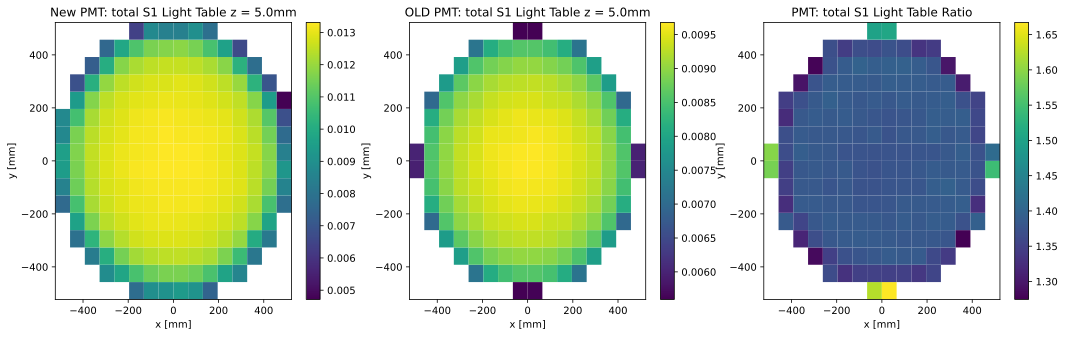

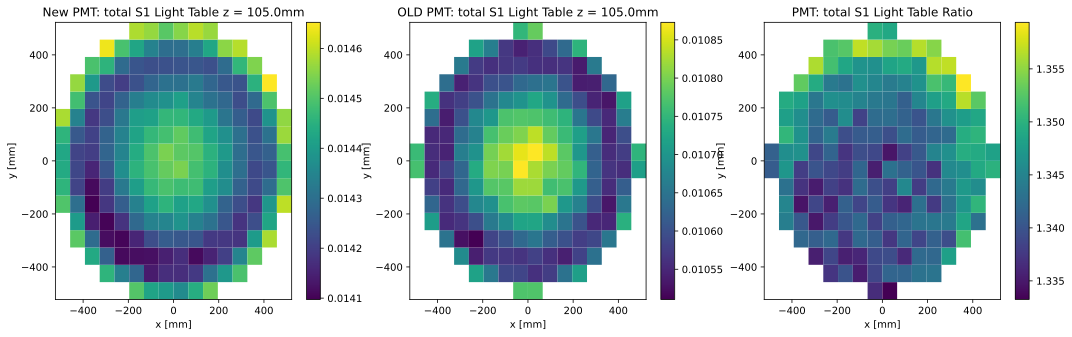

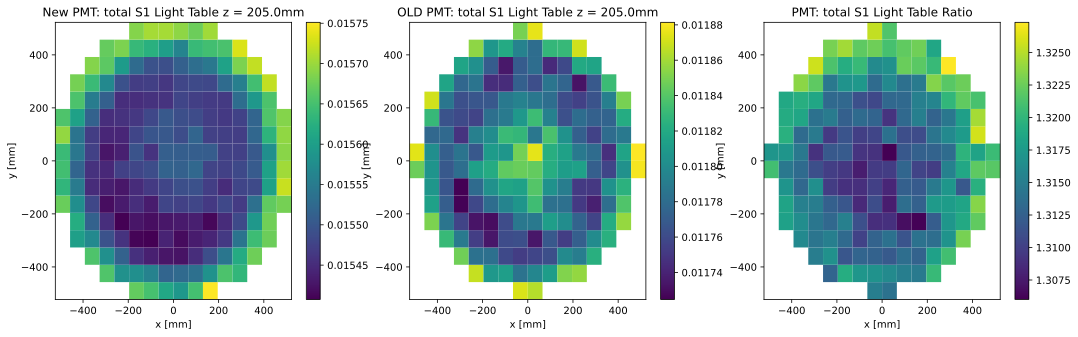

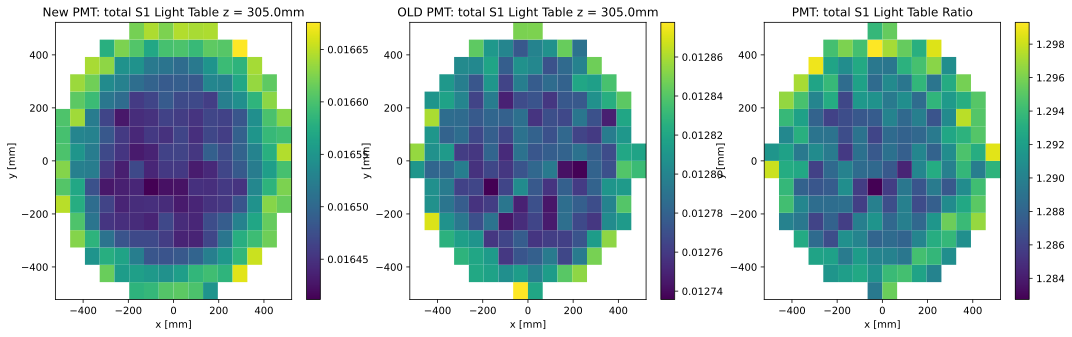

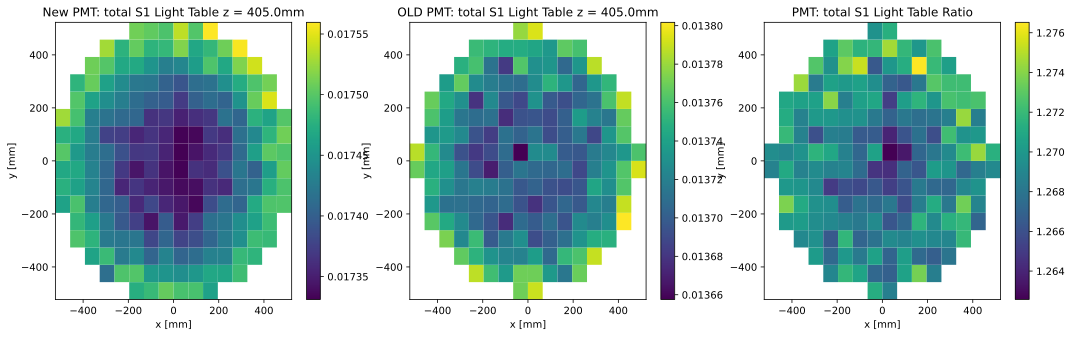

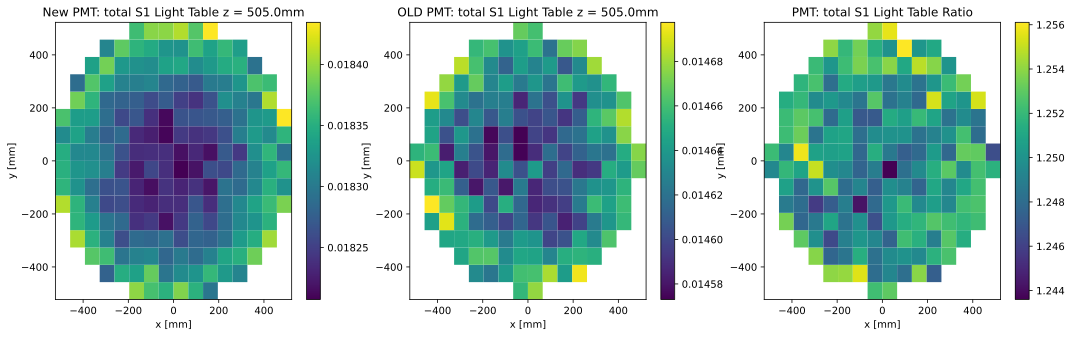

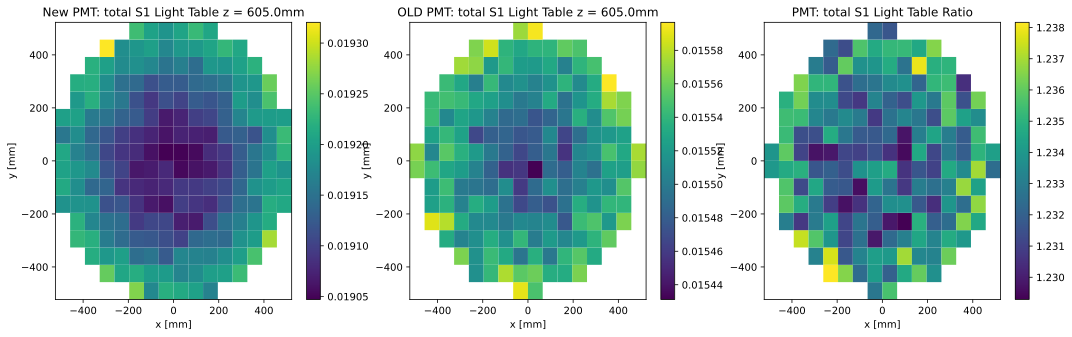

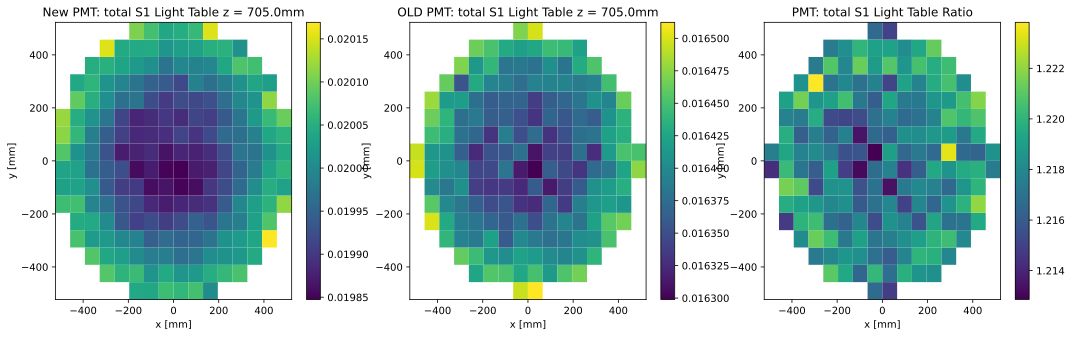

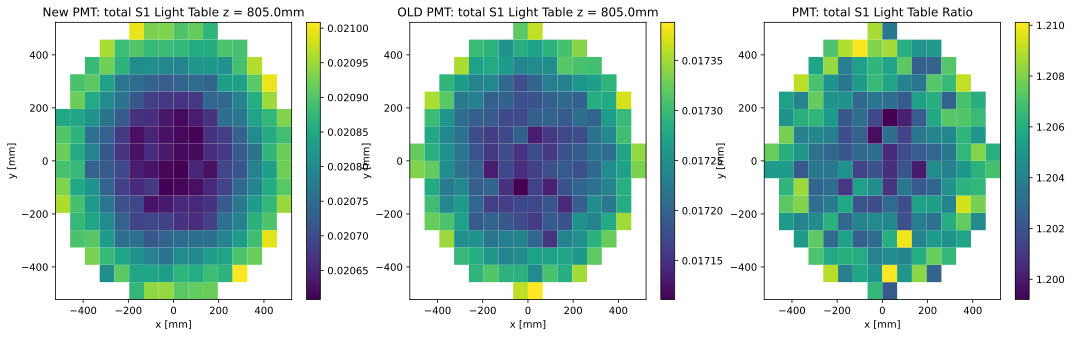

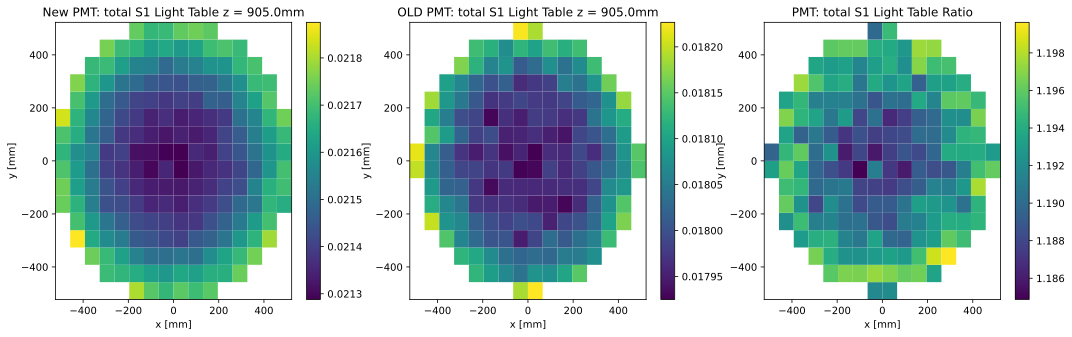

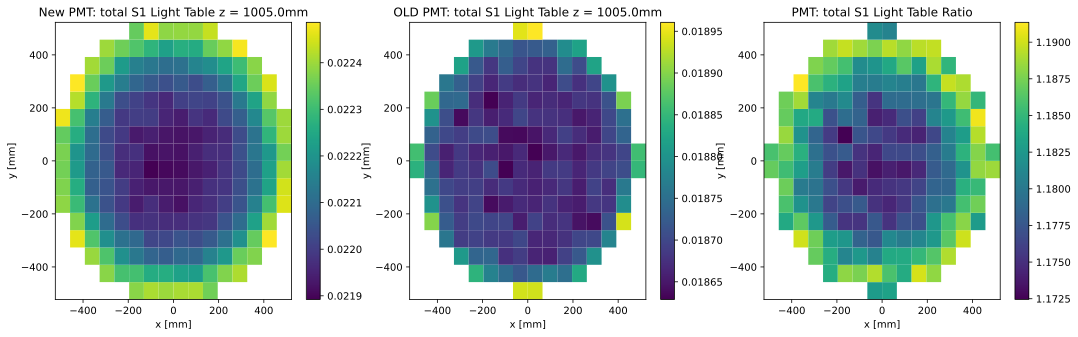

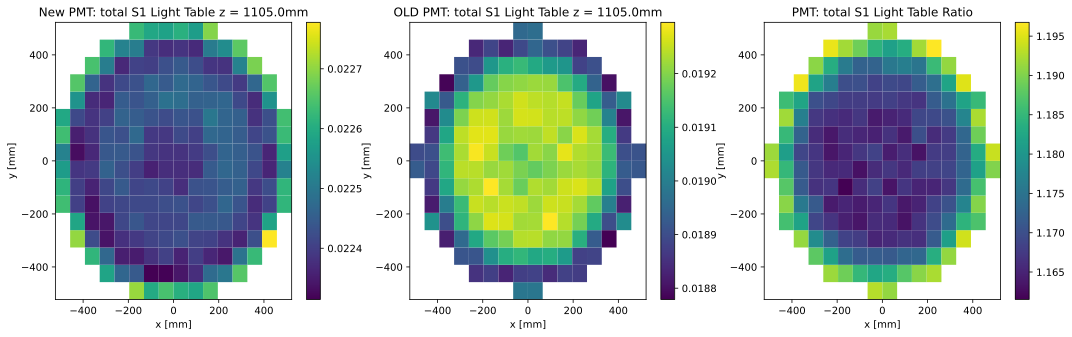

In [19]:
# Plot the slices across all z bins

sensor_id = "total"
sid =sensor_id
sensor_name = "PmtR11410_"+str(sensor_id)


n = 20

print(lt.z.unique())

df = lt

for index, z in enumerate(df.z.unique()):
    # if (index >= n): break
    if (index % 5 !=0): continue

    # print(index % 3)

    sel = lt.z == z
    sel_old = lt_old.z == z

    # Make the LT plot and error plot in one
    fig, (ax0, ax1,ax3) = plt.subplots(1, 3, figsize=[18, 5])
    # fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

    # light table
    # h, _, _ = np.histogram2d(lt[sel]["x"], lt[sel]["y"], weights=lt[sel][sensor_name], bins=[xbins, ybins])
    # im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
    counts0, xedges0, yedges0, im0 = ax0.hist2d(lt[sel]["x"], lt[sel]["y"], weights=lt[sel][sensor_name], bins=[xbins, ybins], cmin = 0.00001)
    # ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    ax0.set_title(f"New PMT: {sensor_id} S1 Light Table z = {z}mm")
    ax0.set_xlabel("x [mm]")
    ax0.set_ylabel("y [mm]")
    fig.colorbar(im0, ax=ax0)

    # OLD
    counts1, xedges1, yedges1, im1 = ax1.hist2d(lt_old[sel_old]["x"], lt_old[sel_old]["y"], weights=lt_old[sel_old][sensor_name], bins=[xbins, ybins], cmin = 0.00001)
    # ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    ax1.set_title(f"OLD PMT: {sensor_id} S1 Light Table z = {z}mm")
    ax1.set_xlabel("x [mm]")
    ax1.set_ylabel("y [mm]")
    fig.colorbar(im1, ax=ax1)

    # Plot the ratio
    pc = ax3.pcolormesh(xedges0, yedges0, (counts0/counts1).T)
    ax3.set_title(f"PMT: {sensor_id} S1 Light Table Ratio")
    ax3.set_xlabel("x [mm]")
    ax3.set_ylabel("y [mm]")
    fig.colorbar(pc)


S2 Table validation plots

In [20]:
# Load in the table
lt     = load_dst("../LT/NEXT100-MC_S2_LT.h5", "LT", "LightTable")
err    = load_dst("../LT/NEXT100-MC_S2_LT.h5", "LT", "Error")
config = load_dst("../LT/NEXT100-MC_S2_LT.h5", "LT", "Config")

bv=20

# display(lt)
# print(sorted(lt.y.unique()))

# display(err)

lt_old     = load_dst(f"../LT/Old_LT/NEXT100_S2_LT.h5", "LT", "LightTable")
config_old = load_dst(f"../LT/Old_LT/NEXT100_S2_LT.h5", "LT", "Config")

In [21]:
display(config)

parameter      value
0     detector    next100
1   ACTIVE_rad       1000
2       EL_GAP       10.0
3   table_type     energy
4  signal_type         S2
5       sensor  PmtR11410
6      pitch_x         15
7      pitch_y         15
8        nexus   v7_08_00

In [22]:
# Set the binning
xmin=-500
xmax=500
xbw=bv

zmin=-10
zmax=0
zbw=10

xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

(-500.0, 500.0)

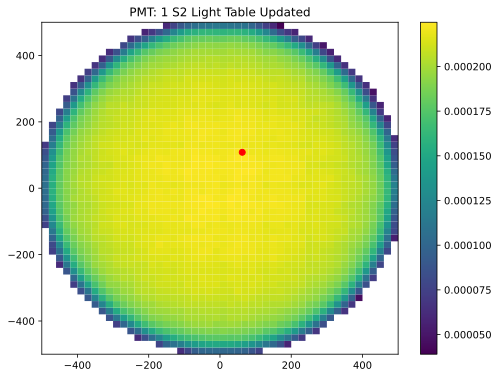

In [23]:
# Plot the slices across all z bins

sensor_id = 1
sid = sensor_id

sensor_name = "PmtR11410_"+str(sensor_id)

df = lt

fig, ax = plt.subplots(figsize=[8, 6])
counts, xedges, yedges, im = ax.hist2d(df.x, df.y, weights=df[pmt + f"_{sid}"], bins=[xbins, ybins], cmin = 0.00001)
plt.scatter(datapmt[datapmt["SensorID"]==sid].X, datapmt[datapmt["SensorID"]==sid].Y, c="r")
plt.colorbar(im, ax=ax)
# plt.savefig(f"S2_LT_{bv}mm_bins_s.pdf")
ax.set_title(f"PMT: {sensor_id} S2 Light Table Updated")
plt.xlim(-500,500)
plt.ylim(-500,500)

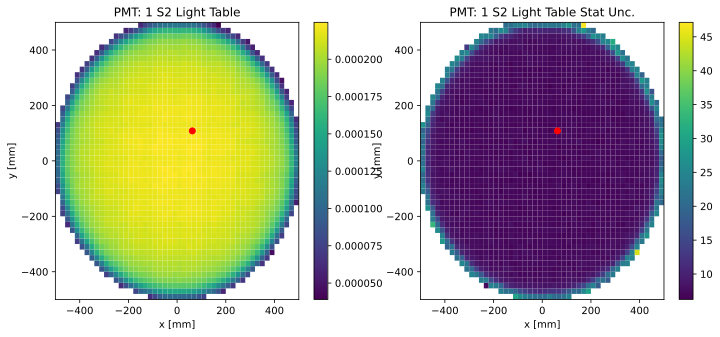

In [24]:
sensor_id = 1
sensor_name = "PmtR11410_"+str(sensor_id)


# Make the LT plot and error plot in one
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 5])
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# light table
# h, _, _ = np.histogram2d(lt["x"], lt["y"], weights=lt[sensor_name], bins=[xbins, ybins])
# im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
counts0, xedges0, yedges0, im0 = ax0.hist2d(lt["x"], lt["y"], weights=lt[sensor_name], bins=[xbins, ybins], cmin = 0.00001)

ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
ax0.set_title(f"PMT: {sensor_id} S2 Light Table")
ax0.set_xlabel("x [mm]")
ax0.set_ylabel("y [mm]")
fig.colorbar(im0, ax=ax0)

# err
# h, _, _ = np.histogram2d(err["x"], err["y"], weights=err[sensor_name], bins=[xbins, ybins])
# im1 = ax1.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], cmap='inferno', vmax=25, vmin=0)

counts1, xedges1, yedges1, im1 = ax1.hist2d(err["x"], err["y"], weights=err[sensor_name], bins=[xbins, ybins], cmin = 0.00001)
ax1.set_title(f"PMT: {sensor_id} S2 Light Table Stat Unc.")
ax1.set_xlabel("x [mm]")
ax1.set_ylabel("y [mm]")
ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
fig.colorbar(im1, ax=ax1)

plt.savefig(f"S2_LT_{bv}mm_bins.pdf")


(-500.0, 500.0)

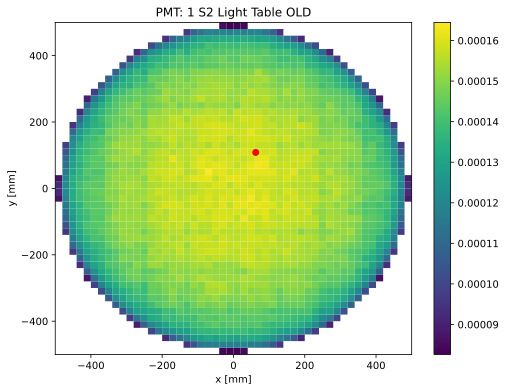

In [25]:
sensor_id = 1
sensor_name = "PmtR11410_"+str(sensor_id)


# Make the LT plot and error plot in one
fig, ax3 = plt.subplots(1, 1, figsize=[8, 6])

# light table
counts3, xedges3, yedges3, im3 = ax3.hist2d(lt_old["x"], lt_old["y"], weights=lt_old[sensor_name], bins=[xbins, ybins], cmin = 0.00001)

ax3.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
ax3.set_title(f"PMT: {sensor_id} S2 Light Table OLD")
ax3.set_xlabel("x [mm]")
ax3.set_ylabel("y [mm]")
fig.colorbar(im3, ax=ax3)
plt.xlim(-500,500)
plt.ylim(-500,500)

# plt.savefig(f"S2_LT_{bv}mm_bins_mesh.pdf")


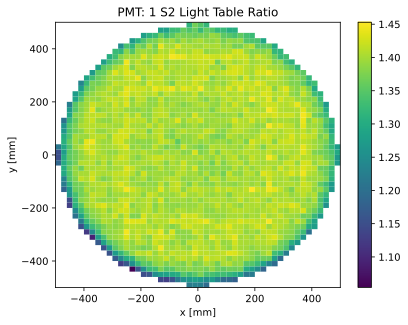

In [26]:
# Plot the ratio
fig = plt.figure()
ax=fig.add_subplot(111)
pc = plt.pcolormesh(xedges, yedges, (counts0/counts3).T)
plt.title(f"PMT: {sensor_id} S2 Light Table Ratio")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
fig.colorbar(pc)

[0. 0. 0. ... 0. 0. 0.]


Text(0, 0.5, 'Counts')

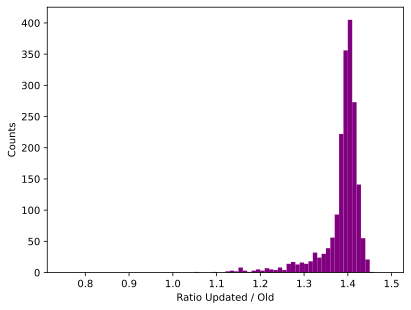

In [27]:
# Make a 1D histogram of the ratio
data = (counts0/counts3).flatten()
data = np.nan_to_num(data)
print(data)

plt.hist(data, bins = np.arange(0.75, 1.5, 0.01), color = "purple")
plt.xlabel("Ratio Updated / Old")
plt.ylabel("Counts")

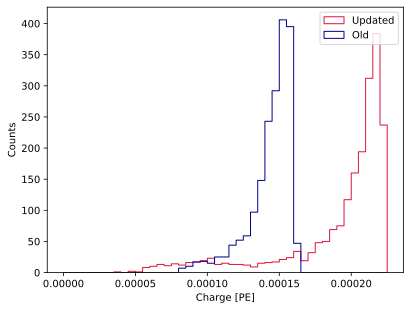

In [28]:
plt.hist(counts0.flatten(), bins = np.arange(0,2.3e-4, 5e-6), histtype="step", color = "crimson", label = "Updated");
plt.hist(counts3.flatten(), bins = np.arange(0,2.3e-4, 5e-6), histtype="step", color = "darkblue", label = "Old");
plt.xlabel("Charge [PE]")
plt.ylabel("Counts")
plt.legend()

In [12]:
# Lets load in the PSF functions for the new LT with square/disk sampling and also the old one
psf_disk    = load_dst(f"../LT/NEXT100_PSF_Disk.h5", "PSF", "LightTable")
psf_square  = load_dst(f"../LT/NEXT100_PSF_square.h5", "PSF", "LightTable")
psf_old     = load_dst(f"../LT/Old_LT/NEXT100_PSF.h5", "PSF", "LightTable")

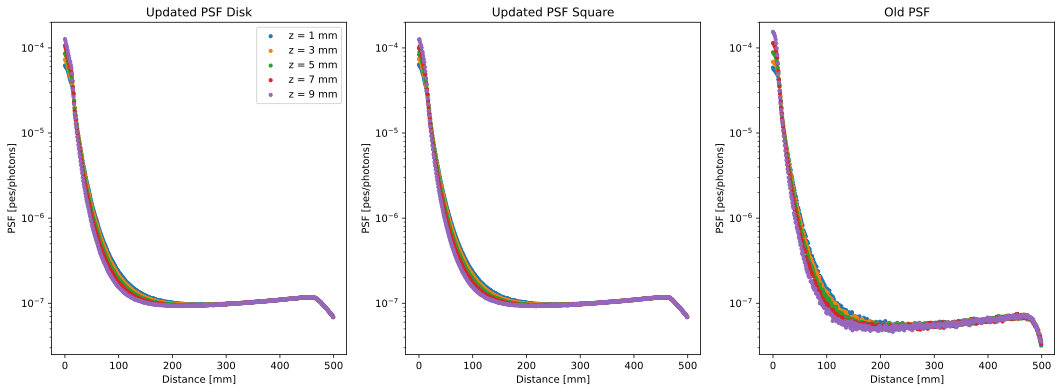

In [50]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=[18,6])
for i in range(1, 11,2):
    
    ax1.scatter(psf_disk.index, psf_disk[f"z_m{i+1}"], s=10, label="z = {0} mm".format(i), linestyle="-")
    ax1.set_yscale("log")
    ax1.set_ylim(2.5e-8, 2e-4)
    ax1.set_xlabel("Distance [mm]")
    ax1.set_ylabel("PSF [pes/photons]")
    ax1.set_title("Updated PSF Disk")
    ax1.legend()

    ax2.scatter(psf_square.index, psf_square[f"z_m{i+1}"], s=10, label="z = {0} mm".format(i), linestyle="-")
    ax2.set_yscale("log")
    ax2.set_ylim(2.5e-8, 2e-4)
    ax2.set_xlabel("Distance [mm]")
    ax2.set_ylabel("PSF [pes/photons]")
    ax2.set_title("Updated PSF Square")

    ax3.scatter(psf_old.index, psf_old[f"z_m{i+1}"], s=10, label="z = {0} mm".format(i), linestyle="-")
    ax3.set_yscale("log")
    ax3.set_ylim(2.5e-8, 2e-4)
    ax3.set_xlabel("Distance [mm]")
    ax3.set_ylabel("PSF [pes/photons]")
    ax3.set_title("Old PSF")


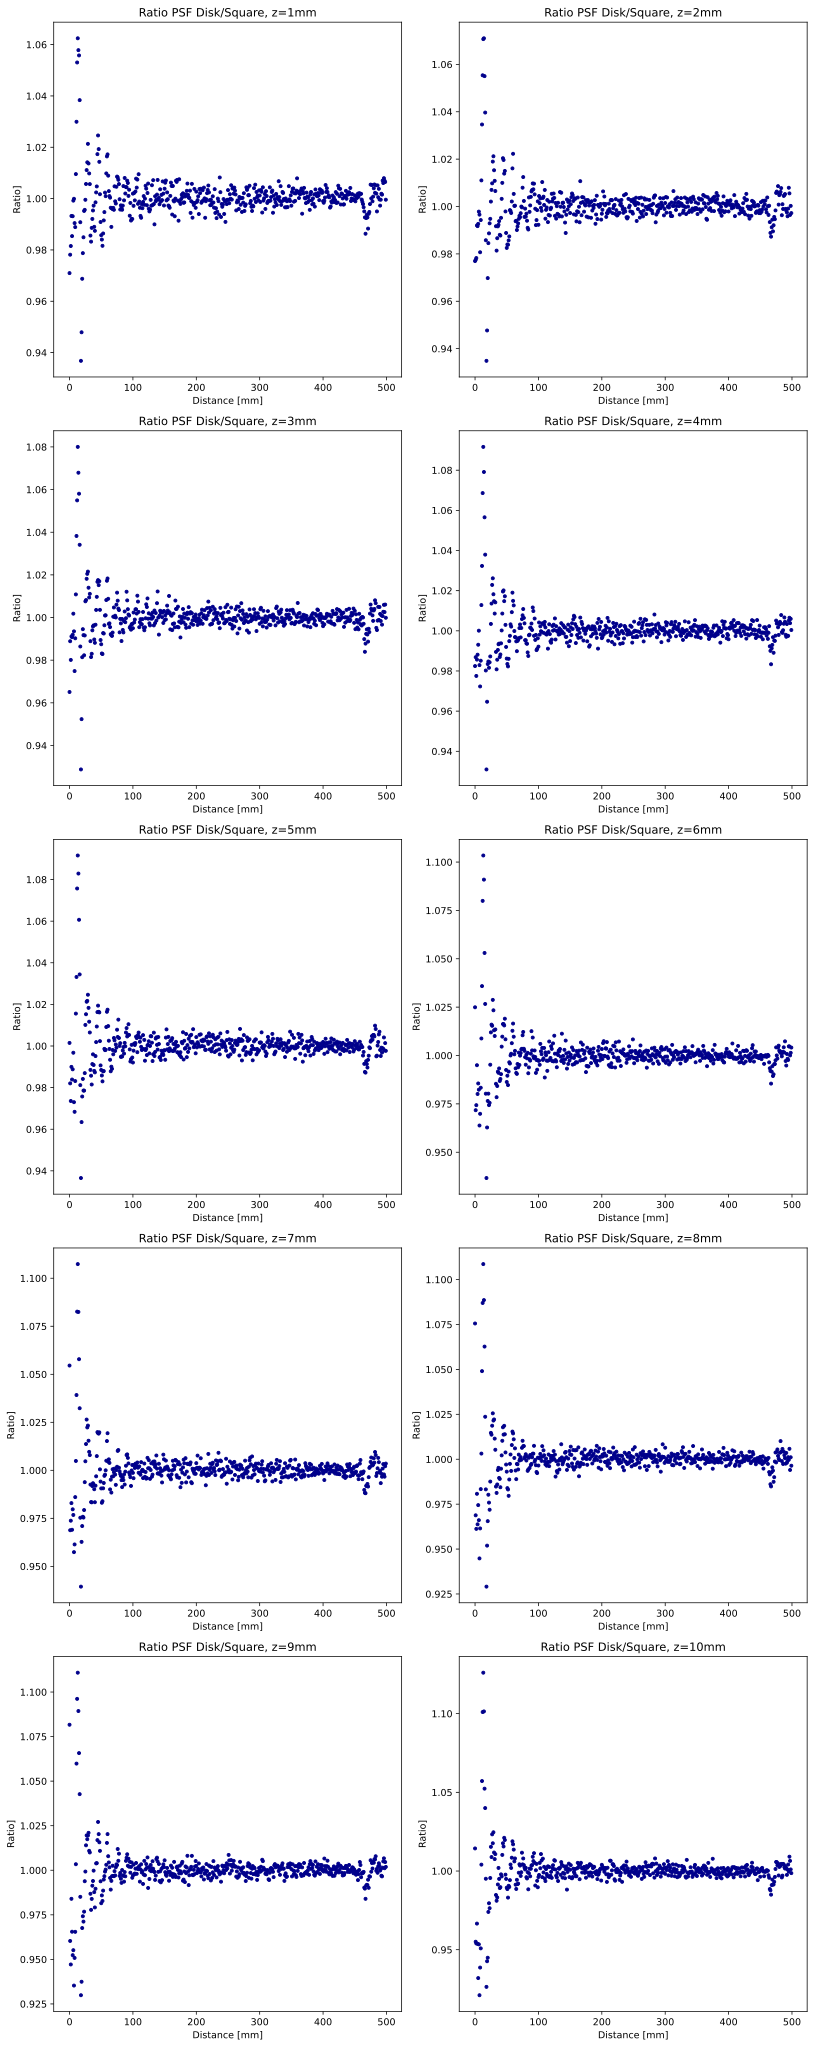

In [57]:
fig, axes = plt.subplots(5, 2, figsize=(12, 30))

counter = 1

# Iterate over each subplot and plot a figure
for i in range(5):
    for j in range(2):
        # Plot a figure in the current subplot
        axes[i, j].scatter(psf_disk.index, psf_disk[f"z_m{counter}"]/psf_square[f"z_m{counter}"], s=10, label="z = {0} mm".format(i), linestyle="-", color = "darkblue")
        axes[i, j].set_title(f'Subplot ({i+1}, {j+1})')

        axes[i, j].set_xlabel("Distance [mm]")
        axes[i, j].set_ylabel("Ratio]")
        axes[i, j].set_title(f"Ratio PSF Disk/Square, z={counter}mm")

        counter+=1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

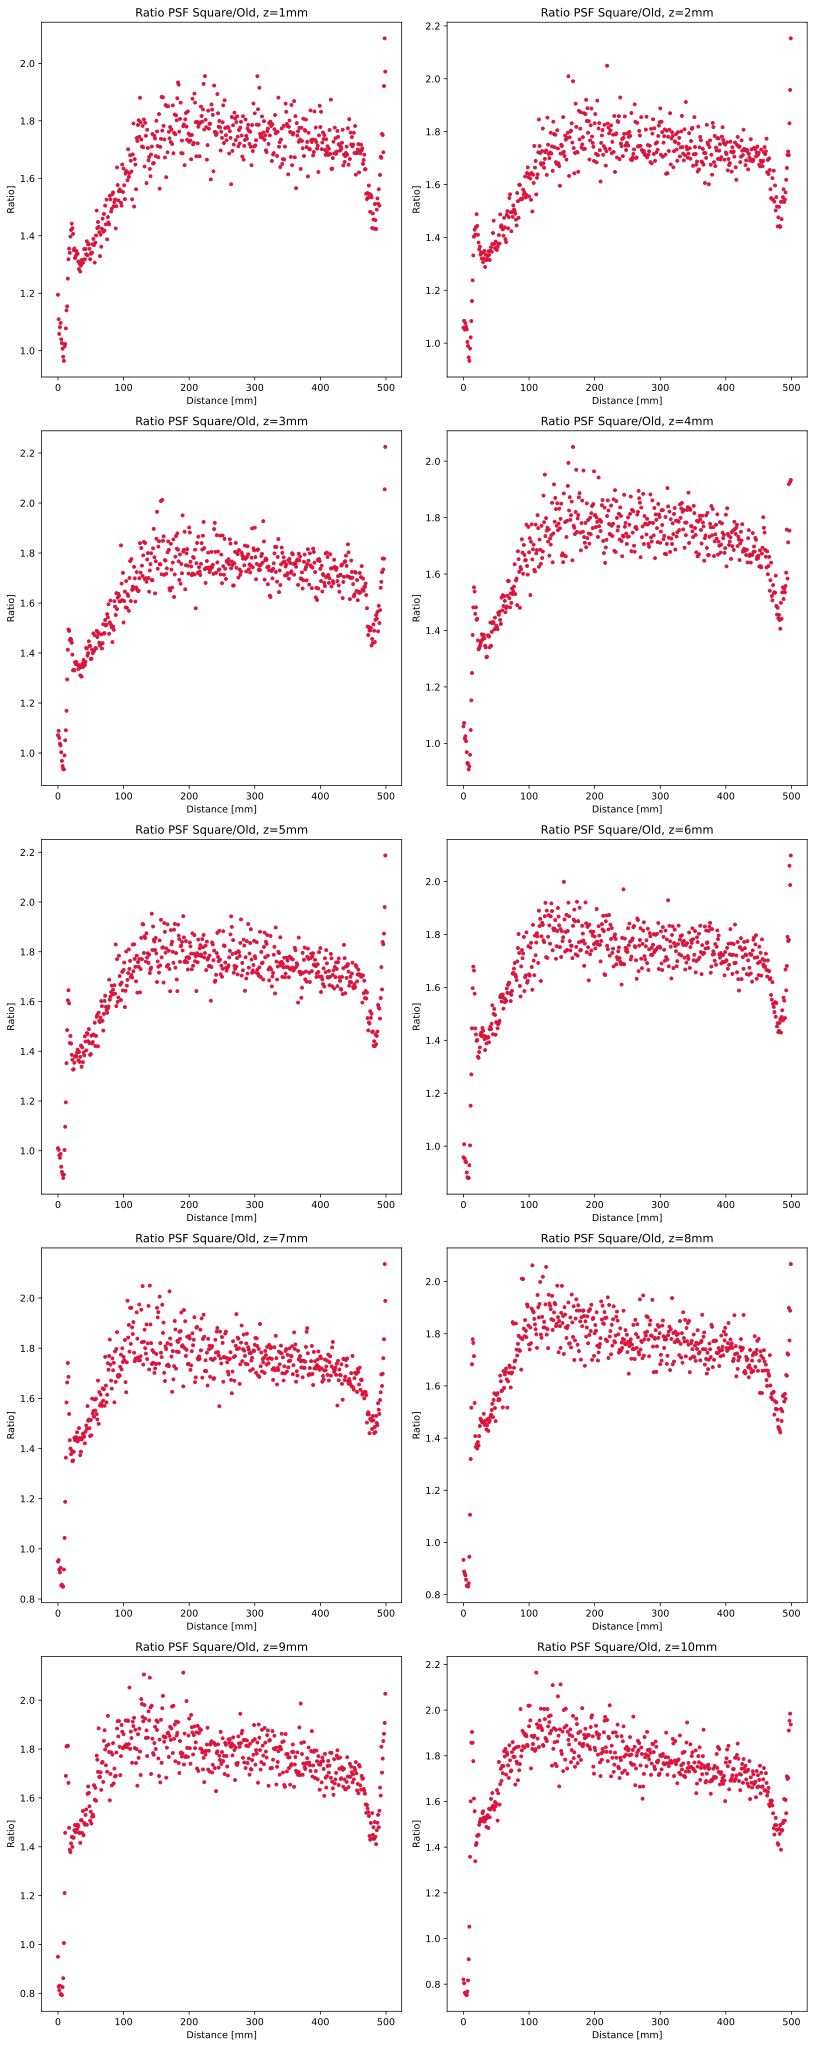

In [59]:
fig, axes = plt.subplots(5, 2, figsize=(12, 30))

counter = 1

# Iterate over each subplot and plot a figure
for i in range(5):
    for j in range(2):
        # Plot a figure in the current subplot
        axes[i, j].scatter(psf_disk.index, psf_disk[f"z_m{counter}"]/psf_old[f"z_m{counter}"], s=10, label="z = {0} mm".format(i), linestyle="-", color = "crimson")
        axes[i, j].set_title(f'Subplot ({i+1}, {j+1})')

        axes[i, j].set_xlabel("Distance [mm]")
        axes[i, j].set_ylabel("Ratio]")
        axes[i, j].set_title(f"Ratio PSF Square/Old, z={counter}mm")

        counter+=1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()